In [369]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
def q90(x):
    return x.quantile(0.9)

def clean_parents(item):
            item = list(eval(item))
            return pd.Series([item[0], item[1]])


problem_names = ["zdt%i"%i for i in range(1,6)]+["ackley","rosenbrock","rastrigin","himmelblau"]
algorithm_names = ["SMSEMOA","NSGA2","UNSGA3","CTAEA"]

problem = "himmelblau"
# problem = "zdt%i"%5
algorithm = "CTAEA"


file_tracker = open("data/test_tracker_%s_%s.csv"%(algorithm,problem), "r")

df = pd.read_csv(file_tracker)
print(df.head(2))
print(df.tail(2))


df[["parent1","parent2"]]=df["parent"].apply(clean_parents)

# Reformat values of "isF"
df.isF.fillna(False,inplace=True)
df.loc[df.isF=="true","isF"]=True
df.loc[df.isF=="false","isF"]=False


df["rank"].fillna(0,inplace=True)


mask = df.groupby(by=["idx"],as_index=False)["iter"].agg([min,max])
mask["lifeIter"] = mask["max"]-mask["min"]
dfMutates = df[["idx","mutate"]].drop_duplicates()
dfMutates.fillna(False,inplace=True)
df2 = pd.merge(mask,dfMutates,on=["idx"],how="inner")

dft = pd.merge(df,df2,on=["idx"],how="inner")
dft["name"]=dft["idx"]+"_"+dft["iter"].astype(str)

#Network data
import networkx as nx
edgesp1 = zip(dft["parent1"],dft["idx"])
edgesp2 = zip(dft["parent2"],dft["idx"])

G1 = nx.Graph()
G1.add_edges_from(edgesp1)
G1.add_edges_from(edgesp2)
G1.remove_node("0")
degree = dict(G1.degree)
dft["degree"] = dft.idx.map(degree)

dft.rename(columns={"mutate_y":"mutate"},inplace=True)


   iter  idx  created_gen  rank  crowding          parent mutate  mutate_rate  \
0     1  1_0            1     0       NaN      ['0', '0']    NaN          NaN   
1     2  2_0            2     0       NaN  ['1_0', '1_0']   True          0.0   

    isF  
0  True  
1  True  
     iter    idx  created_gen  rank  crowding              parent mutate  \
198   199  164_0          164     0       NaN  ['114_0', '114_0']   True   
199   200  164_0          164     0       NaN  ['114_0', '114_0']   True   

     mutate_rate   isF  
198          0.0  True  
199          0.0  True  


In [370]:
dig = dft.groupby("idx").first()
dig

,iter,created_gen,rank,crowding,parent,mutate_x,mutate_rate,isF,parent1,parent2,min,max,lifeIter,mutate,name,degree
idx,,,,,,,,,,,,,,,,
114_0,114,114,0,NaN,"['92_0', '92_0']",True,0.0,True,92_0,92_0,114,163,49,True,114_0_114,2
13_0,13,13,0,NaN,"['8_0', '8_0']",True,0.0,True,8_0,8_0,13,16,3,True,13_0_13,2
164_0,164,164,0,NaN,"['114_0', '114_0']",True,0.0,True,114_0,114_0,164,200,36,True,164_0_164,1
17_0,17,17,0,NaN,"['13_0', '13_0']",True,0.0,True,13_0,13_0,17,22,5,True,17_0_17,2
1_0,1,1,0,NaN,"['0', '0']",None,NaN,True,0,0,1,1,0,False,1_0_1,1
23_0,23,23,0,NaN,"['17_0', '17_0']",True,0.0,True,17_0,17_0,23,24,1,True,23_0_23,2
25_0,25,25,0,NaN,"['23_0', '23_0']",True,0.0,True,23_0,23_0,25,25,0,True,25_0_25,2
26_0,26,26,0,NaN,"['25_0', '25_0']",True,0.0,True,25_0,25_0,26,90,64,True,26_0_26,2
2_0,2,2,0,NaN,"['1_0', '1_0']",True,0.0,True,1_0,1_0,2,4,2,True,2_0_2,2


### Diferencias entre mutados y no mutados 

In [371]:
dfi = dig[dig["mutate"]==True].groupby(by="iter").aggregate({"lifeIter":[np.mean,q90]}).rename(columns={"lifeIter":"life Mutate"},level=0)
dfi2 = dig[dig["mutate"]==False].groupby(by="iter").aggregate({"lifeIter":[np.mean,q90]}).rename(columns={"lifeIter":"life NoMut"},level=0)

In [372]:
dfi

life Mutate      
            mean   q90
iter                  
2            2.0   2.0
5            1.0   1.0
7            0.0   0.0
8            4.0   4.0
13           3.0   3.0
17           5.0   5.0
23           1.0   1.0
25           0.0   0.0
26          64.0  64.0
91           0.0   0.0
92          21.0  21.0
114         49.0  49.0
164         36.0  36.0

In [373]:
idx = pd.IndexSlice
dfti = dfi.merge(dfi2, left_on='iter', right_on='iter')

s = dfti.loc[:,idx["life Mutate","mean"]] - dfti.loc[:,idx["life NoMut","mean"]]
print(s.describe())
sq = dfti.loc[:,idx["life Mutate","q90"]] - dfti.loc[:,idx["life NoMut","q90"]]
print(sq.describe())

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64


<Axes: xlabel='iter'>

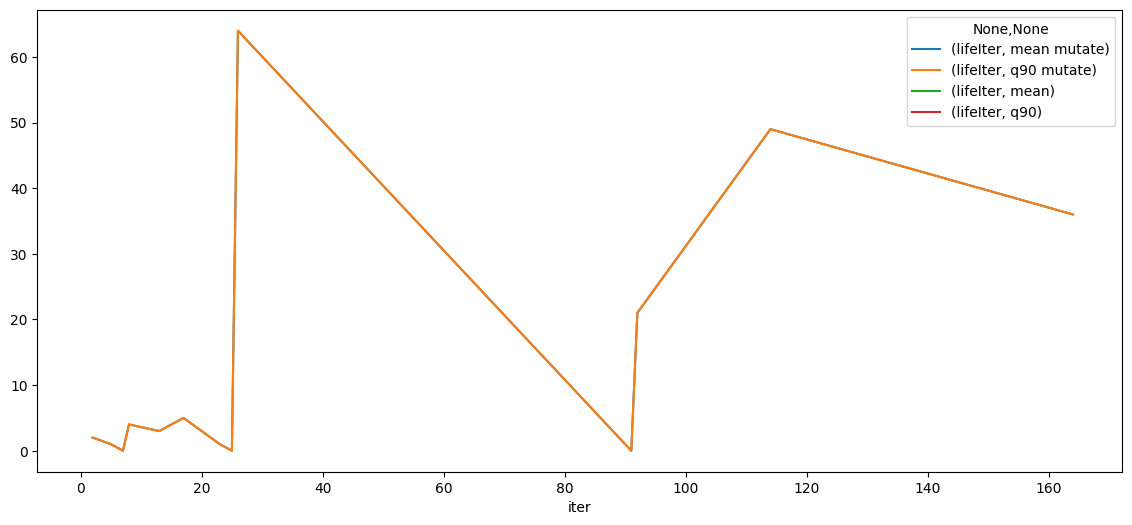

In [374]:
# Para calcular la distribución de vida
# hay que eliminar individuos que no pertenecen a esa iter
di = dft[dft.iter==dft.created_gen]

fig, ax = plt.subplots(figsize=(14,6))
di[di["mutate"]==True].groupby(by="iter").aggregate({"lifeIter":[np.mean,q90]}).rename(columns = {'mean': 'mean mutate',"q90":"q90 mutate"},level=1).plot(ax=ax)
di[di["mutate"]==False].groupby(by="iter").aggregate({"lifeIter":[np.mean,q90]}).plot(ax=ax)
# di.groupby(by="iter").aggregate({"lifeIter":[np.mean]}).plot()


<Axes: xlabel='iter'>

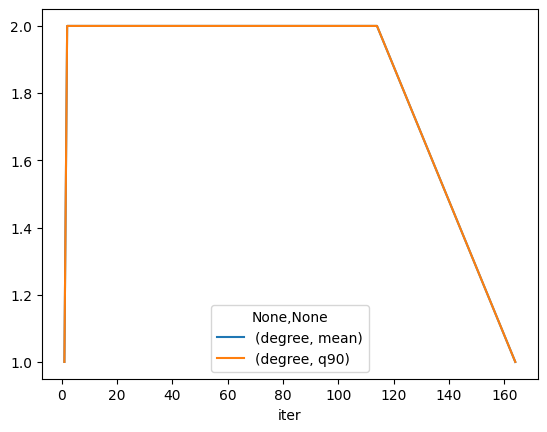

In [375]:

dig.groupby(by="iter").aggregate({"degree":[np.mean,q90]}).plot()

In [376]:
# agrupar varias generaciones en una sola

di["a_iter"]=di["iter"]//5

/var/folders/6j/7gfvt_29797dypw8t1wttblw0000gn/T/ipykernel_75359/2995766977.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  di["a_iter"]=di["iter"]//5


<Axes: xlabel='a_iter'>

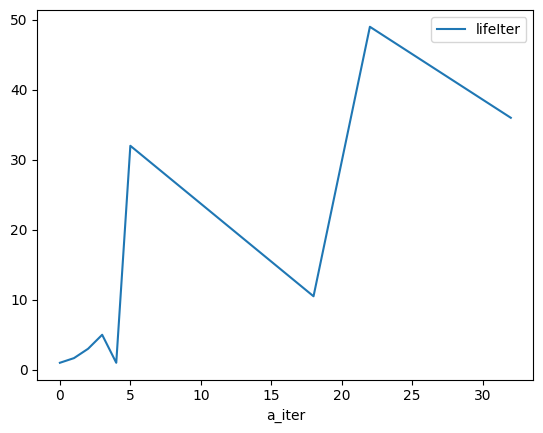

In [377]:
di.groupby(by="a_iter").aggregate({"lifeIter":np.mean}).plot()

<Axes: xlabel='a_iter', ylabel='lifeIter'>

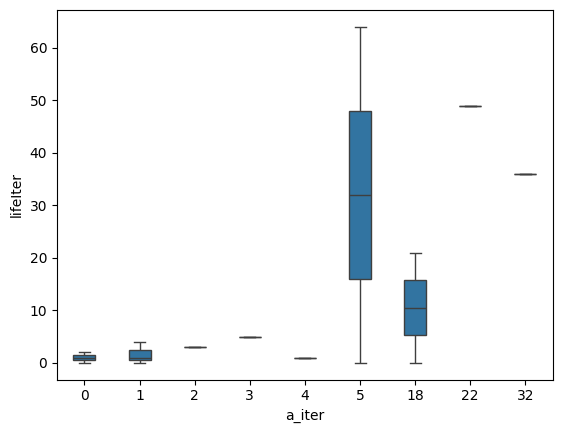

In [378]:
sns.boxplot(data=di, x="a_iter", y="lifeIter", gap=.5)

<Axes: xlabel='iter', ylabel='degree'>

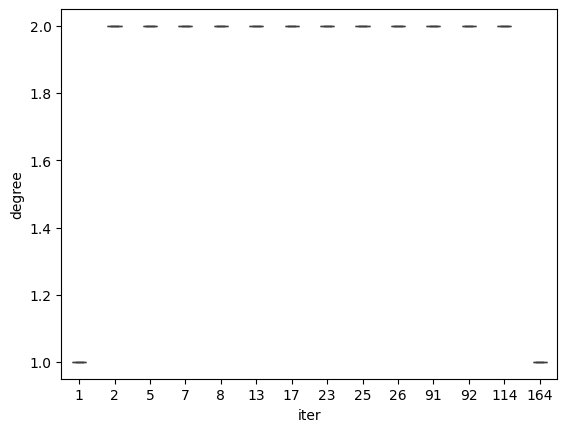

In [379]:
sns.boxplot(data=dig, x="iter", y="degree", gap=.5)

<Axes: xlabel='a_iter'>

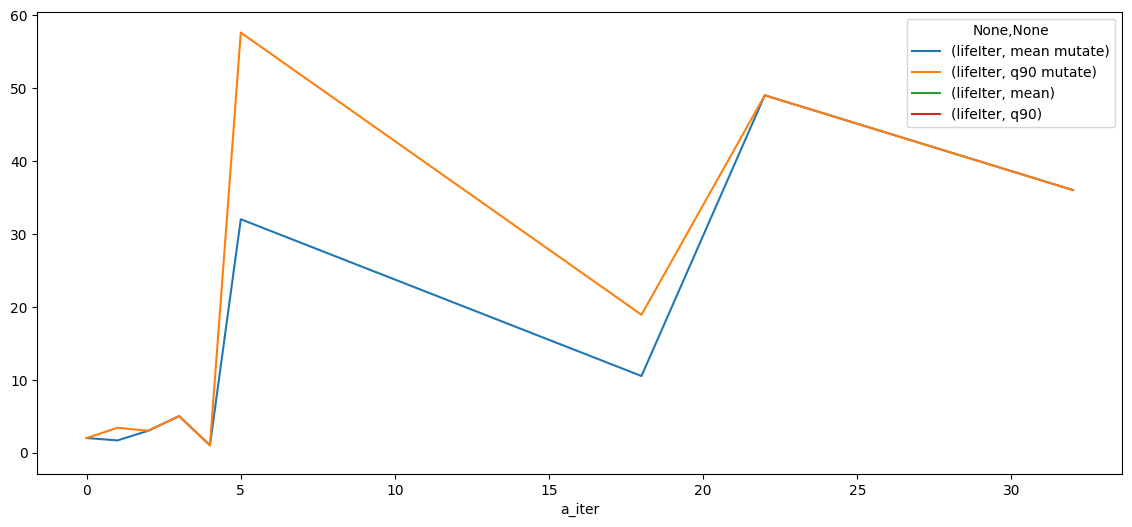

In [380]:
#agrupadas
fig, ax = plt.subplots(figsize=(14,6))
di[di["mutate"]==True].groupby(by="a_iter").aggregate({"lifeIter":[np.mean,q90]}).rename(columns = {'mean': 'mean mutate',"q90":"q90 mutate"},level=1).plot(ax=ax)
di[di["mutate"]==False].groupby(by="a_iter").aggregate({"lifeIter":[np.mean,q90]}).plot(ax=ax)

Text(0, 0.5, 'Longevity')

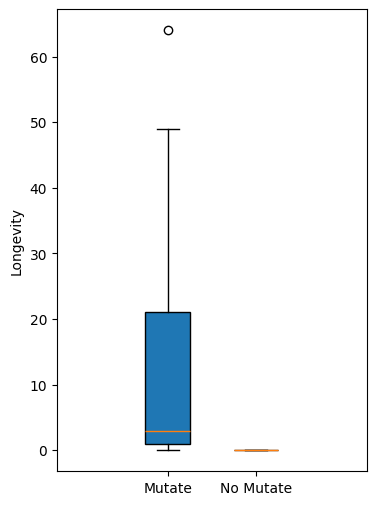

In [381]:
fig, ax = plt.subplots(figsize=(4,6))
valuesdict = {"Mutate":di[di["mutate"]==True]["lifeIter"],
                "No Mutate":di[di["mutate"]==False]["lifeIter"]}

bp1 = ax.boxplot(valuesdict["Mutate"], positions=[1], widths=0.2, patch_artist=True)
bp2 = ax.boxplot(valuesdict["No Mutate"], positions=[1.4], widths=0.2, patch_artist=True)
ax.set_xticks([1, 1.4])
ax.set_xticklabels(['Mutate', 'No Mutate'])
ax.set_ylabel('Longevity')

In [382]:
## CDF y PDF
dfone = dft.groupby("idx").first()
stats_df = dfone.groupby('lifeIter')['lifeIter'].agg('count').pipe(pd.DataFrame).rename(columns = {'lifeIter': 'frequency'})

# PDF
stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

# CDF
stats_df['cdf'] = stats_df['pdf'].cumsum()
stats_df = stats_df.reset_index()
stats_df


,lifeIter,frequency,pdf,cdf
0,0,4,0.285714,0.285714
1,1,2,0.142857,0.428571
2,2,1,0.071429,0.500000
3,3,1,0.071429,0.571429
4,4,1,0.071429,0.642857
5,5,1,0.071429,0.714286
6,21,1,0.071429,0.785714
7,36,1,0.071429,0.857143
8,49,1,0.071429,0.928571
9,64,1,0.071429,1.000000


<Axes: xlabel='lifeIter'>

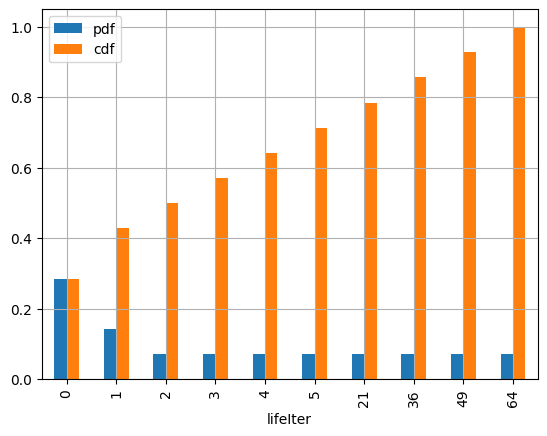

In [383]:
stats_df.plot.bar(x = 'lifeIter', y = ['pdf', 'cdf'], grid = True)